In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Train image shape:  (60000, 28, 28, 1)
Test image shape:  (10000, 28, 28, 1)
K = 1 :the accuracy is 0.9631
K = 2 :the accuracy is 0.954
K = 3 :the accuracy is 0.9633
K = 4 :the accuracy is 0.9607
K = 5 :the accuracy is 0.9618
K = 6 :the accuracy is 0.961
K = 7 :the accuracy is 0.9615
K = 8 :the accuracy is 0.9594
K = 9 :the accuracy is 0.9597
K = 10 :the accuracy is 0.9588


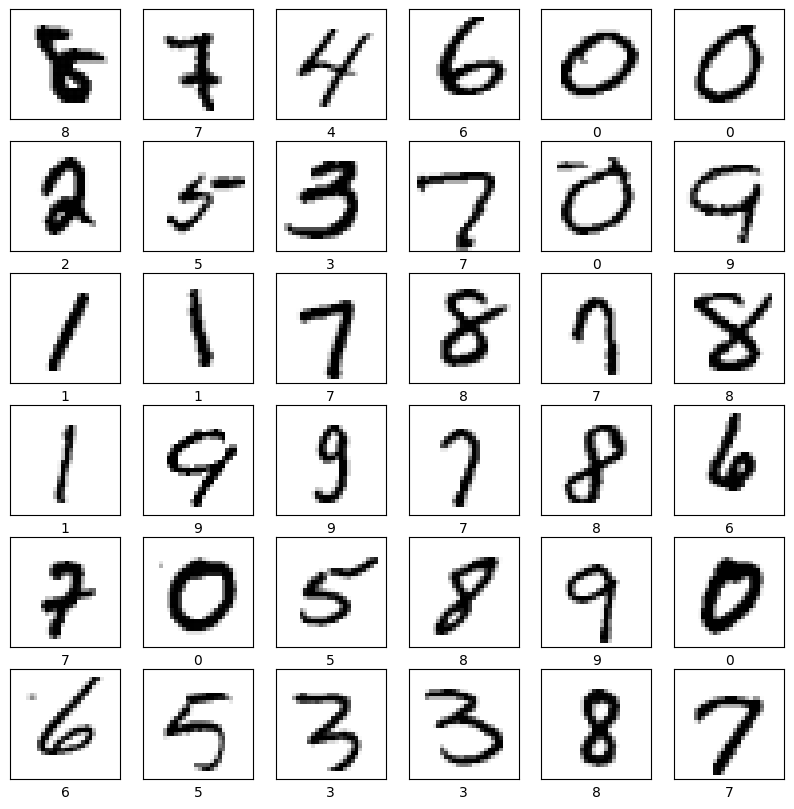

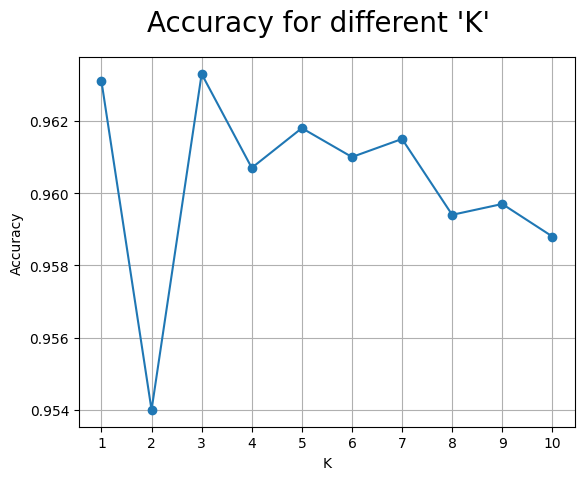

In [1]:
import os
os.chdir('/content/drive/MyDrive/comp5214/PA1')
from data_loader import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,  confusion_matrix
(train_images, train_labels), (test_images, test_labels) = load_mnist()
# parameters
MAX_K = 10
TRAIN_SIZE = 60000
TEST_SIZE = 10000
IMG_SIZE = 28 * 28
errors = np.zeros(MAX_K)
knn = KNeighborsClassifier(n_neighbors=1, p=1, algorithm='ball_tree')
knn.fit(train_images.reshape(TRAIN_SIZE, IMG_SIZE), train_labels)

for K in range(1, MAX_K + 1):
    print("K =", K, end=" :")

    # Set the number of neighbors
    knn.n_neighbors = K
    prediction = knn.predict(test_images.reshape(TEST_SIZE, IMG_SIZE))

    # Calculate errors
    num_error = np.sum(test_labels != prediction)
    errors[K - 1] = num_error
    accuracy = 1 - num_error / TEST_SIZE
    print("the accuracy is", accuracy)
fig, axs = plt.subplots(1, 1)
k = np.arange(1, MAX_K + 1, 1)

fig.suptitle(r"Accuracy for different 'K'", fontsize=20)
axs.plot(k, 1 - errors / TEST_SIZE, marker='o')  # Plot the graph

plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k)
plt.grid()
plt.show()